In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 2

In [16]:
df = pd.read_csv('BiologicalInterfaceNanohedraScores.csv', index_col=[0])

In [20]:
df = df.T

In [27]:
df = df.apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna(axis=1)

In [17]:
display(df.shape)
print('Cleaning df of Nan')
clean_na_df = df.dropna()
# clean_na_df = clean_na_df.apply(pd.to_numeric)
display(clean_na_df.shape)

(14, 13477)

Cleaning df of Nan


(13, 13477)

In [22]:
df.rename(columns={'unique_fragments': 'number_fragments', 'nanohedra_score_per_res': 'nanohedra_score_center_normalized',
                   'number_fragment_residues_central': 'number_fragment_residues_center',
                   'nanohedra_score_central': 'nanohedra_score_center'}, inplace=True)

In [7]:
for column in clean_na_df.columns:
    if column == 'fragment_cluster_ids':
        continue
    clean_na_df[column] = clean_na_df[column].astype(float)

/home/kylemeador/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [28]:
df

,nanohedra_score,nanohedra_score_center,interface_area,multiple_fragment_ratio,number_fragment_residues_all,number_fragment_residues_center,total_interface_residues,number_fragments,percent_residues_fragment_all,percent_residues_fragment_center,percent_fragment_helix,percent_fragment_strand,percent_fragment_coil
4G1T-1,27.240666,6.648547,3467.71,1.666667,62.0,18.0,164.0,15.0,0.378049,0.109756,0.966667,0.000000,0.033333
3G1U-1,48.062636,13.767056,2897.57,2.818182,63.0,22.0,87.0,31.0,0.724138,0.252874,0.790323,0.016129,0.193548
3G16-1,0.000000,0.000000,2790.59,0.000000,0.0,0.0,109.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3G1T-1,118.105772,41.004499,1266.23,4.367347,111.0,49.0,78.0,107.0,1.423077,0.628205,0.710280,0.042056,0.247664
3G17-1,11.023073,2.442072,1005.43,1.428571,29.0,7.0,50.0,5.0,0.580000,0.140000,1.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3AGR-1,16.338407,3.503703,3031.31,1.333333,54.0,12.0,101.0,8.0,0.534653,0.118812,0.875000,0.062500,0.062500
3AGP-1,0.000000,0.000000,1420.14,0.000000,0.0,0.0,40.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2AG5-3,6.656381,1.331276,742.91,3.000000,10.0,2.0,50.0,3.0,0.200000,0.040000,0.000000,0.500000,0.500000
4AGH-1,21.161663,4.313525,2188.27,1.500000,38.0,8.0,78.0,6.0,0.487179,0.102564,0.500000,0.500000,0.000000


In [24]:
clean_na_df.dtypes

4G1T-1     object
3G1U-1     object
3G16-1    float64
3G1T-1     object
3G17-1     object
           ...   
3AGR-1     object
3AGP-1    float64
2AG5-3     object
4AGH-1     object
1AGX-1     object
Length: 13477, dtype: object

In [29]:
df['nanohedra_score_center_normalized'] = df['nanohedra_score_center'] / df['number_fragment_residues_center']

In [32]:
df['multiple_fragment_ratio_new'] = df['number_fragments'] / df['number_fragment_residues_center']

In [34]:
# df['nanohedra_score_normalized'] = df['nanohedra_score'] / df ['number_fragment_residues_total']
df['total_non_fragment_interface_residues'] = df['total_interface_residues'] - df ['number_fragment_residues_center']
# display(df)

In [35]:
df.describe()

,nanohedra_score,nanohedra_score_center,interface_area,multiple_fragment_ratio,number_fragment_residues_all,number_fragment_residues_center,total_interface_residues,number_fragments,percent_residues_fragment_all,percent_residues_fragment_center,percent_fragment_helix,percent_fragment_strand,percent_fragment_coil,nanohedra_score_center_normalized,multiple_fragment_ratio_new,total_non_fragment_interface_residues
count,13477.000000,13477.000000,13477.000000,13477.000000,13477.000000,13477.000000,13477.000000,13477.000000,13477.000000,13477.000000,13477.000000,13477.000000,13477.000000,9515.000000,9515.000000,13477.000000
mean,21.067543,6.098885,1496.102075,1.699743,30.626475,10.083698,67.437412,14.982192,0.412312,0.133822,0.388001,0.174042,0.143974,0.532943,1.203754,57.353714
std,28.168342,9.132199,1071.241851,1.774366,34.336191,12.989903,49.372012,26.855903,0.404503,0.149941,0.401831,0.300130,0.224331,0.201359,0.829962,43.648316
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200005,0.500000,0.000000
25%,0.000000,0.000000,848.250000,0.000000,0.000000,0.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.374215,0.625000,30.000000
50%,11.233799,2.561885,1296.360000,1.333333,21.000000,6.000000,59.000000,4.000000,0.340426,0.090909,0.258065,0.000000,0.000000,0.517291,0.954545,48.000000
75%,30.370957,8.430705,1883.440000,2.400000,46.000000,15.000000,87.000000,18.000000,0.655738,0.208333,0.800000,0.250000,0.236111,0.668416,1.485667,75.000000
max,531.445723,183.373418,24265.570000,13.066667,562.000000,262.000000,720.000000,622.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.296073,6.533333,679.000000


In [32]:
plot_df = clean_na_df

0.4326682371297553

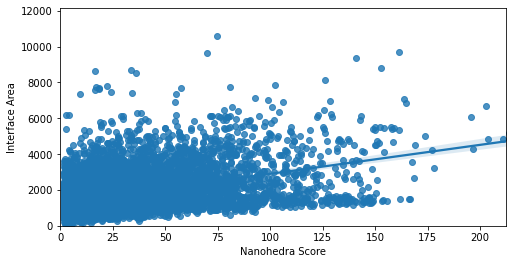

0.43108655432527143

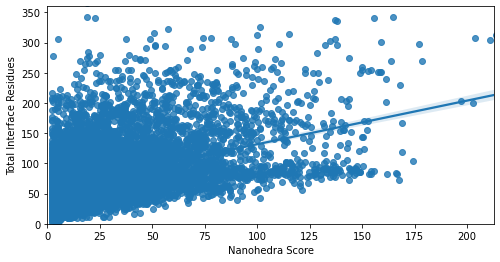

0.39832583962977547

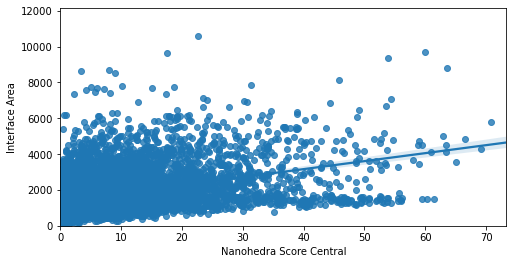

0.37721958735625505

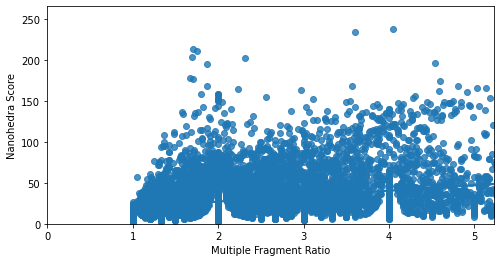

0.07981072900931309

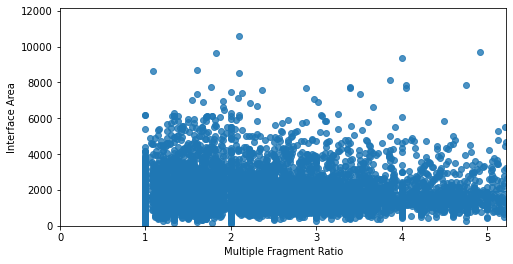

In [57]:
data_pairs = [('nanohedra_score', 'interface_area'), ('nanohedra_score', 'total_interface_residues'), # ('nanohedra_score_central', 'nanohedra_score'), <-- 0.97 correlation
              ('nanohedra_score_central', 'interface_area'), 
              ('multiple_fragment_ratio', 'nanohedra_score'), # ('nanohedra_score', 'number_fragment_residues_central'),
              ('multiple_fragment_ratio', 'interface_area')]
# for x, y in data_pairs:
#     ax = sns.displot(data=plot_df, x=x, y=y, palette='colorblind', kind='kde', rug=True, linewidth = 3)  # hue='protocol', legend=False, kde=True, multiple="stack")
#     ax.set(xlabel=' '.join(x.split('_')).title(), ylabel=' '.join(y.split('_')).title())
# ay = sns.displot(data=df, x='Predicted Binding Energy', hue='protocol', palette='colorblind', kind='kde', linewidth = 3)  # kde=True, multiple="stack")
# ay.set(ylabel='Frequency')

for x, y in data_pairs:
    display(plot_df[x].corr(plot_df[y]))
    f, axs = plt.subplots(1, 1, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4]))
    y_values = plot_df[y].values
    x_values = plot_df[x].values
    ax = sns.regplot(x=x, y=y, data=plot_df, ax=axs) 
    ax.set_ylim(0, np.max(y_values)*0.5)  # showfliers=False)
    ax.set_xlim(0, np.max(x_values)*0.4)
#     if y == 'int_energy_res_summary_delta':
#         y = 'predicted_binding_energy'
#     if x == 'protocol_energy_distance_sum':
#         x = 'protocol_distance'
    ax.set(xlabel=' '.join(x.split('_')).title(), ylabel=' '.join(y.split('_')).title())
#     f.add_subplot(ax)
    plt.show()